### Question 6 -
#### Using the data from Question 3, write code to analyze the data and answer the following questions Note 1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
#### 2. Write code comments wherever required for code understanding
#### Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%\
● Get all Pokemons that have less than 4 weaknesses\
● Get all Pokemons that have no multipliers at all\
● Get all Pokemons that do not have more than 2 evolutions\
● Get all Pokemons whose spawn time is less than 300 seconds.

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

requests_url=requests.get(url)

data=requests_url.json()

In [3]:
data

{'pokemon': [{'id': 1,
   'num': '001',
   'name': 'Bulbasaur',
   'img': 'http://www.serebii.net/pokemongo/pokemon/001.png',
   'type': ['Grass', 'Poison'],
   'height': '0.71 m',
   'weight': '6.9 kg',
   'candy': 'Bulbasaur Candy',
   'candy_count': 25,
   'egg': '2 km',
   'spawn_chance': 0.69,
   'avg_spawns': 69,
   'spawn_time': '20:00',
   'multipliers': [1.58],
   'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
   'next_evolution': [{'num': '002', 'name': 'Ivysaur'},
    {'num': '003', 'name': 'Venusaur'}]},
  {'id': 2,
   'num': '002',
   'name': 'Ivysaur',
   'img': 'http://www.serebii.net/pokemongo/pokemon/002.png',
   'type': ['Grass', 'Poison'],
   'height': '0.99 m',
   'weight': '13.0 kg',
   'candy': 'Bulbasaur Candy',
   'candy_count': 100,
   'egg': 'Not in Eggs',
   'spawn_chance': 0.042,
   'avg_spawns': 4.2,
   'spawn_time': '07:00',
   'multipliers': [1.2, 1.6],
   'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
   'prev_evolution': [{'num': '001', 'name'

##### 1. Get all Pokemons whose spawn rate is less than 5%


In [4]:
selected_pokemon = [pokemon for pokemon in data["pokemon"] if pokemon["spawn_chance"] < 0.05]

# Extract spawn rates and names
spawn_rates = [pokemon["spawn_chance"] for pokemon in selected_pokemon]
pokemon_names = [pokemon["name"] for pokemon in selected_pokemon]

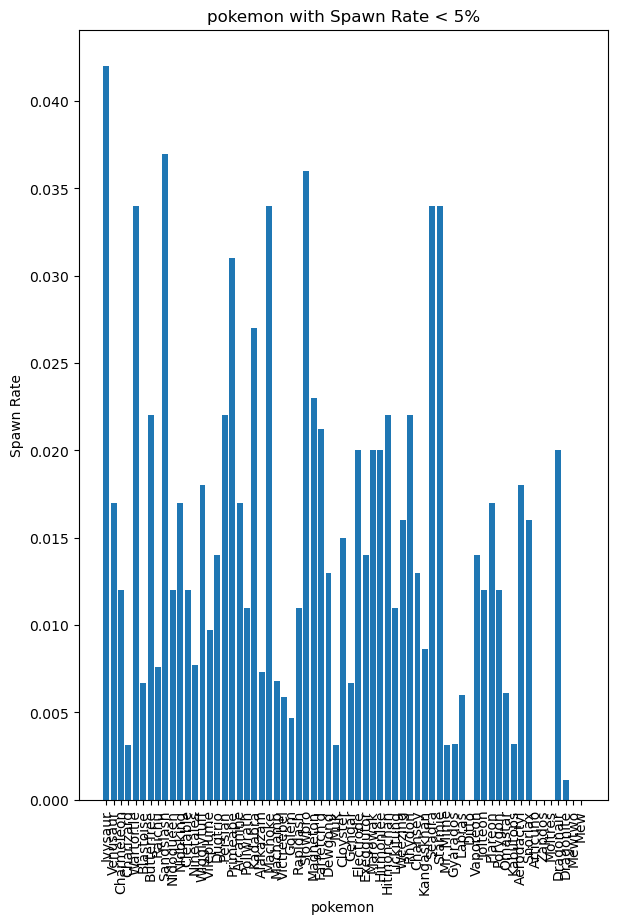

In [5]:
# Plotting the analysis
plt.figure(figsize=(15, 10))

# Bar plot for spawn rates
plt.subplot(1, 2, 1)
plt.bar(pokemon_names, spawn_rates)
plt.xlabel("pokemon")
plt.ylabel("Spawn Rate")
plt.title("pokemon with Spawn Rate < 5%")
plt.xticks(rotation=90)
plt.show()

##### 2. Get all Pokemons that have less than 4 weaknesses


In [6]:
pockemon_weakness=[pokemon for pokemon in data["pokemon"] if len(pokemon["weaknesses"]) < 4]

In [7]:
# Count the occurrences of Pokemon types
type_counts = {}
for pokemon in pockemon_weakness:
    for type in pokemon["type"]:
        if type in type_counts:
            type_counts[type] += 1
        else:
            type_counts[type] = 1


In [8]:
#Sort the type counts in descending order
sorted_type_counts = {k: v for k, v in sorted(type_counts.items(), key=lambda item: item[1], reverse=True)}

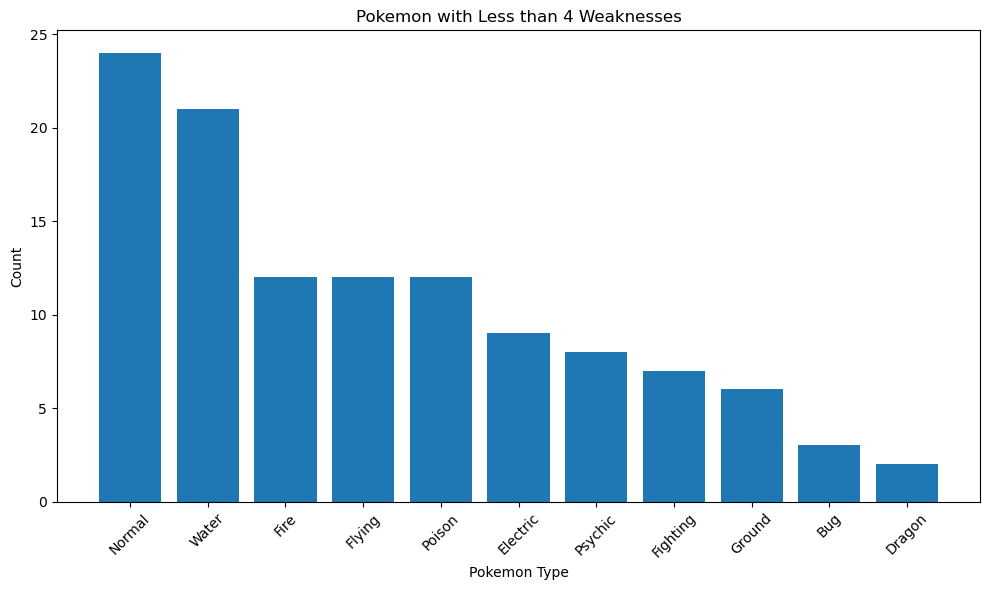

In [9]:
# Plotting the analysis
plt.figure(figsize=(10, 6))

# Bar plot for Pokemon types
plt.bar(sorted_type_counts.keys(), sorted_type_counts.values())
plt.xlabel("Pokemon Type")
plt.ylabel("Count")
plt.title("Pokemon with Less than 4 Weaknesses")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### 3. Get all Pokemons that have no multipliers at all

In [10]:
no_multiplier_pokemon = [pokemon for pokemon in data["pokemon"] if not pokemon.get("multipliers")]
# Count the occurrences of pokemon types
type_counts = {}
for pokemon in no_multiplier_pokemon:
    for type in pokemon["type"]:
        if type in type_counts:
            type_counts[type] += 1
        else:
            type_counts[type] = 1

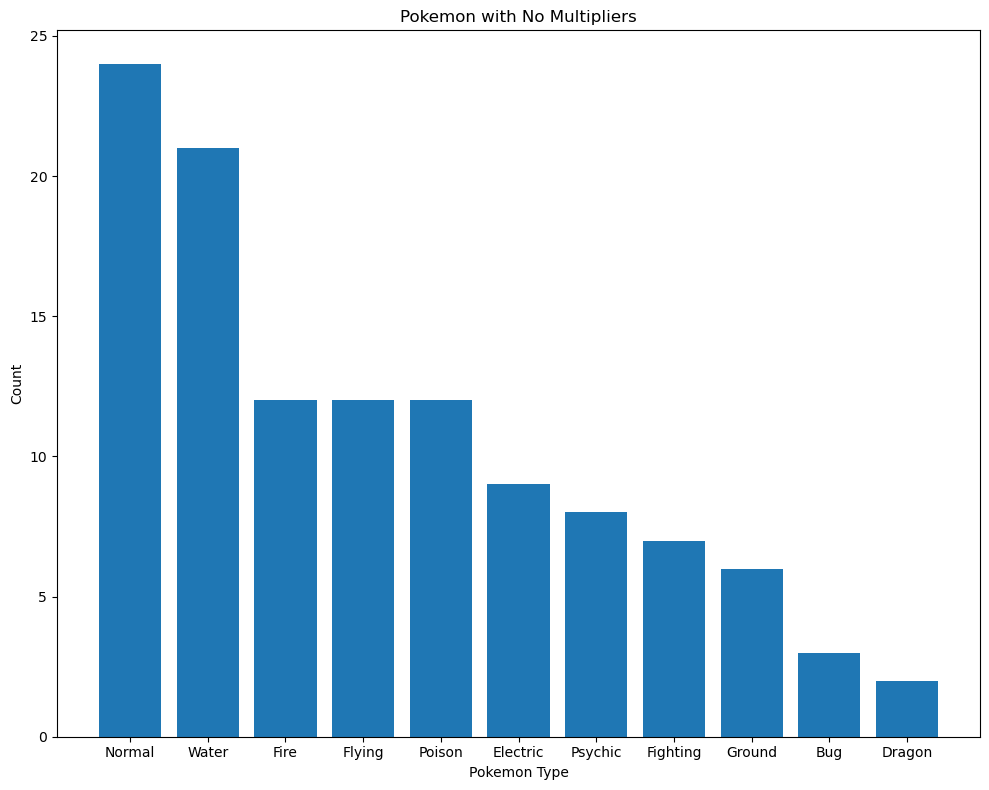

In [11]:
# Plotting the analysis
plt.figure(figsize=(10,8))

# Bar plot for Pokémon types
plt.bar(sorted_type_counts.keys(), sorted_type_counts.values())
plt.xlabel("Pokemon Type")
plt.ylabel("Count")
plt.title("Pokemon with No Multipliers")

plt.tight_layout()
plt.show()

##### 4. Get all Pokemons that do not have more than 2 evolutions

In [12]:
next_evolution = [pokemon for pokemon in data["pokemon"] if len(pokemon.get("next_evolution", [])) <= 2]

# Count the occurrences of Pokemon types
type_counts = {}
for pokemon in next_evolution:
    for type in pokemon["type"]:
        if type in type_counts:
            type_counts[type] += 1
        else:
            type_counts[type] = 1

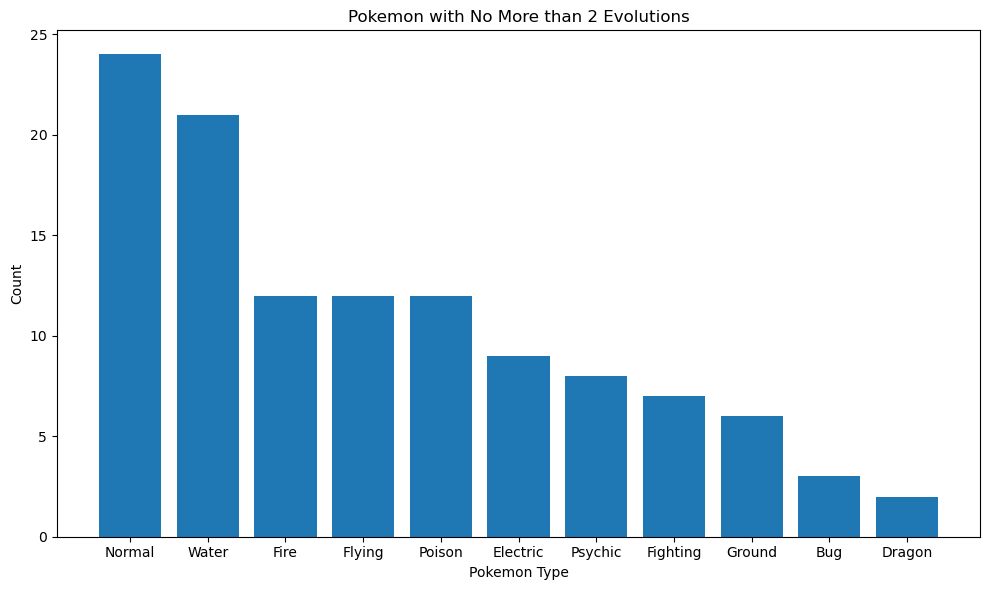

In [13]:
# Plotting the analysis
plt.figure(figsize=(10, 6))

# Bar plot for Pokemon types
plt.bar(sorted_type_counts.keys(), sorted_type_counts.values())
plt.xlabel("Pokemon Type")
plt.ylabel("Count")
plt.title("Pokemon with No More than 2 Evolutions")

plt.tight_layout()
plt.show()

##### 5. Get pokemon with spawn time less than 300 seconds


In [14]:
spawn_time = [pokemon for pokemon in data["pokemon"] if pokemon["spawn_time"] != "N/A" and int(pokemon["spawn_time"].split(':')[1]) < 300]

# Count the occurrences of pokemon types
type_counts = {}
for pokemon in spawn_time:
    for type in pokemon["type"]:
        if type in type_counts:
            type_counts[type] += 1
        else:
            type_counts[type] = 1


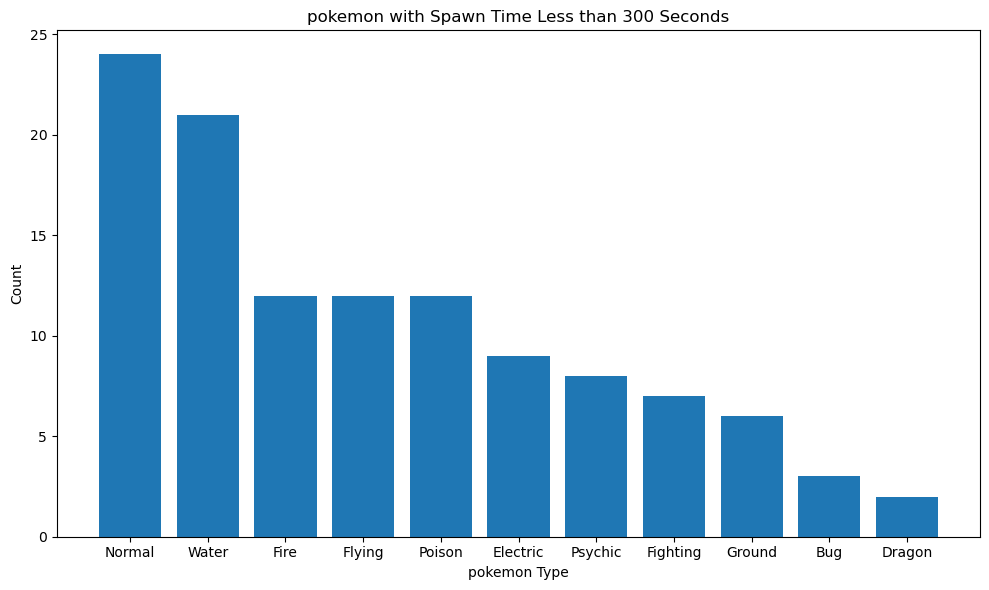

In [15]:
# Plotting the analysis
plt.figure(figsize=(10, 6))

# Bar plot for pokemon types
plt.bar(sorted_type_counts.keys(), sorted_type_counts.values())
plt.xlabel("pokemon Type")
plt.ylabel("Count")
plt.title("pokemon with Spawn Time Less than 300 Seconds")
 
plt.tight_layout()
plt.show()
